### 1. Analyse videos with OpenFace

In [1]:
import os
import subprocess
import pandas as pd

base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
openface_cmd = "/home/maram/OpenFace/build/bin/FeatureExtraction"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

for emotion in emotions:
    emotion_path = os.path.join(base_path, emotion)
    video_files = [f for f in os.listdir(emotion_path) if f.endswith(".mp4")]

    all_au_r_dfs = []

    for video_file in video_files:
        video_path = os.path.join(emotion_path, video_file)
        output_dir = os.path.join(emotion_path, "OpenFace")
        os.makedirs(output_dir, exist_ok=True)

        # Run OpenFace
        subprocess.run([
            openface_cmd,
            "-f", video_path,
            "-out_dir", output_dir
        ])

        # Construct path to output CSV
        csv_name = video_file.replace(".mp4", ".csv")
        csv_path = os.path.join(output_dir, csv_name)

        # Extract *_r AU columns
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            au_r_columns = [col for col in df.columns if col.endswith("_r") and col.startswith("AU")]
            if au_r_columns:
                all_au_r_dfs.append(df[au_r_columns])
            else:
                print(f"No AU_r columns found in: {csv_path}")
        else:
            print(f"CSV not found: {csv_path}")

    # Combine and calculate mean
    if all_au_r_dfs:
        combined_df = pd.concat(all_au_r_dfs, ignore_index=True)
        mean_au_r = combined_df.mean()

        # Save to CSV
        mean_csv_path = os.path.join(emotion_path, f"mean_AUs_r_{emotion}.csv")
        mean_au_r.to_csv(mean_csv_path, header=["mean_value"])
        print(f"Saved mean AUs_r for {emotion} → {mean_csv_path}")
    else:
        print(f"No AU_r data found for {emotion}")


Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /home/maram/OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /home/maram/OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: /home/maram/OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /home/maram/OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /home/maram/OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....l

### 2. Save results in PNG format for each emotion

Saved plot for Happiness to /home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/Happiness/Happiness_OpenFace_au_plot.png


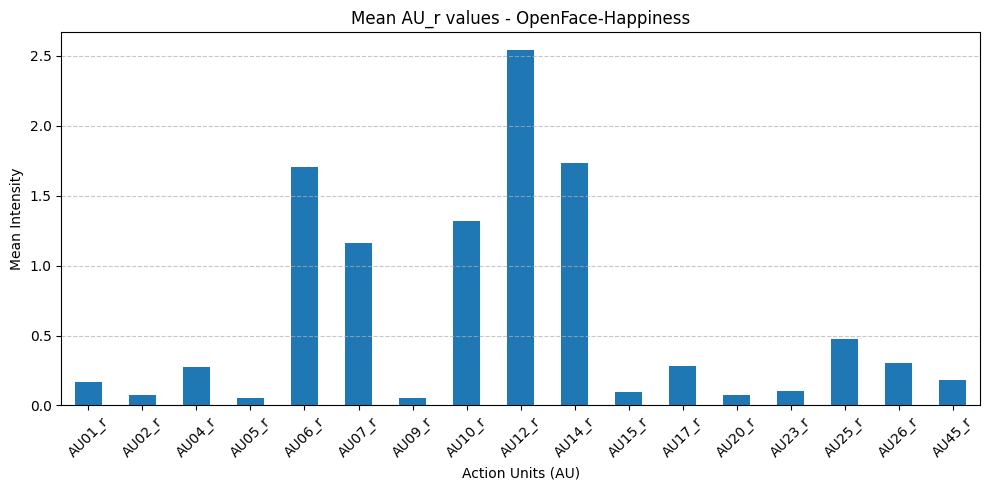

Saved plot for Fear to /home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/Fear/Fear_OpenFace_au_plot.png


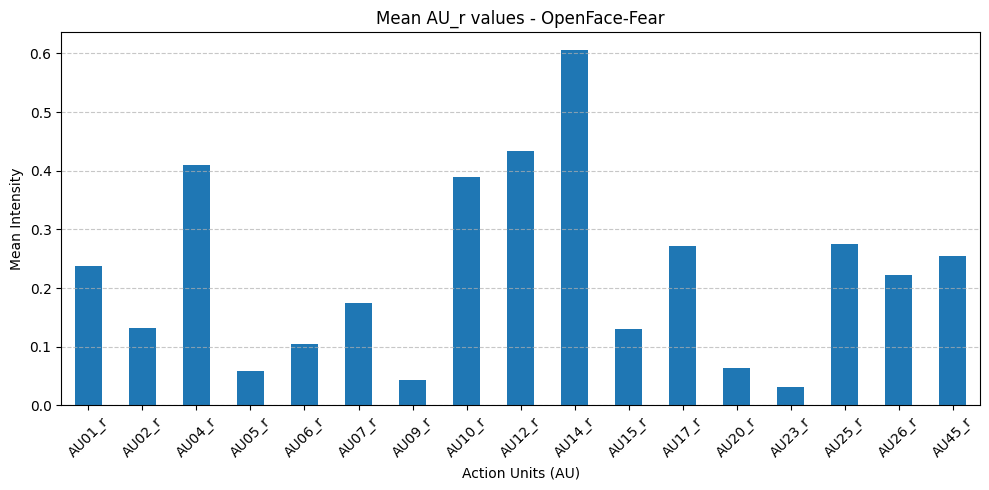

Saved plot for Surprise to /home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/Surprise/Surprise_OpenFace_au_plot.png


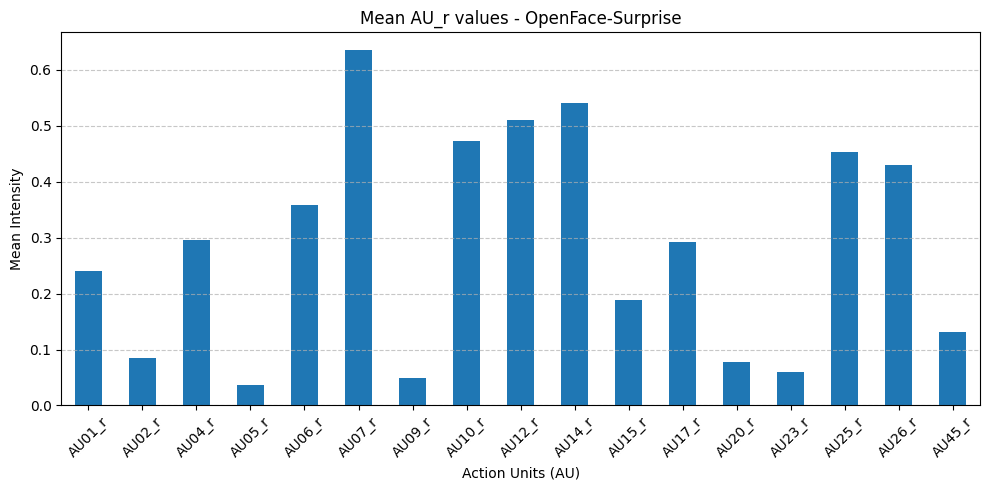

Saved plot for Anger to /home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/Anger/Anger_OpenFace_au_plot.png


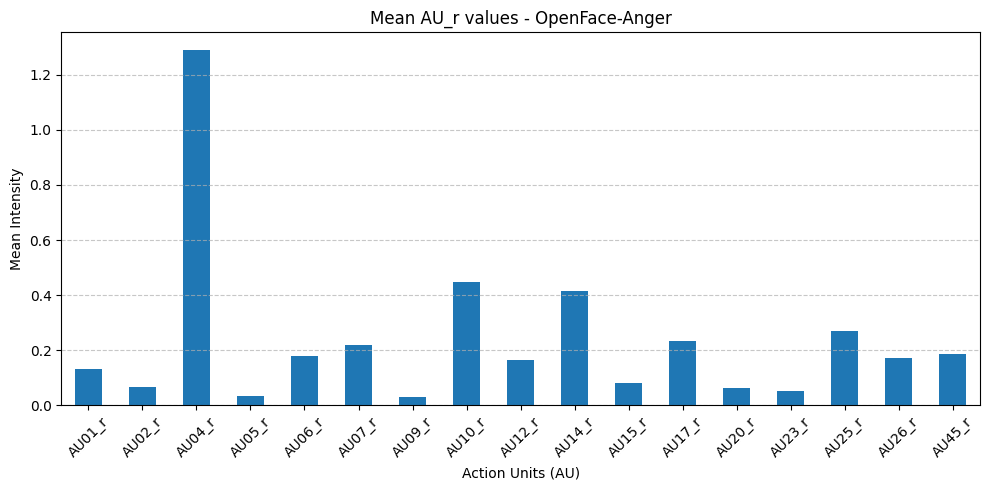

Saved plot for Disgust to /home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/Disgust/Disgust_OpenFace_au_plot.png


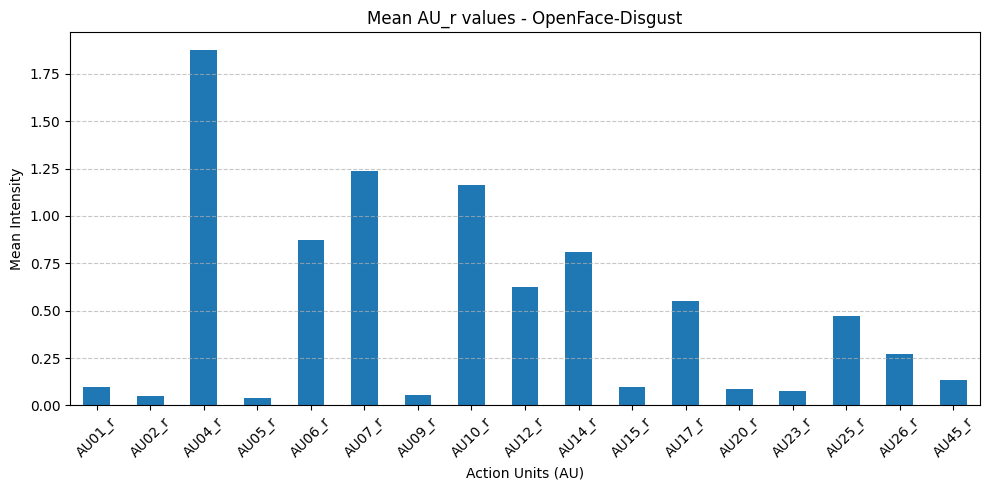

Saved plot for Sadness to /home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/Sadness/Sadness_OpenFace_au_plot.png


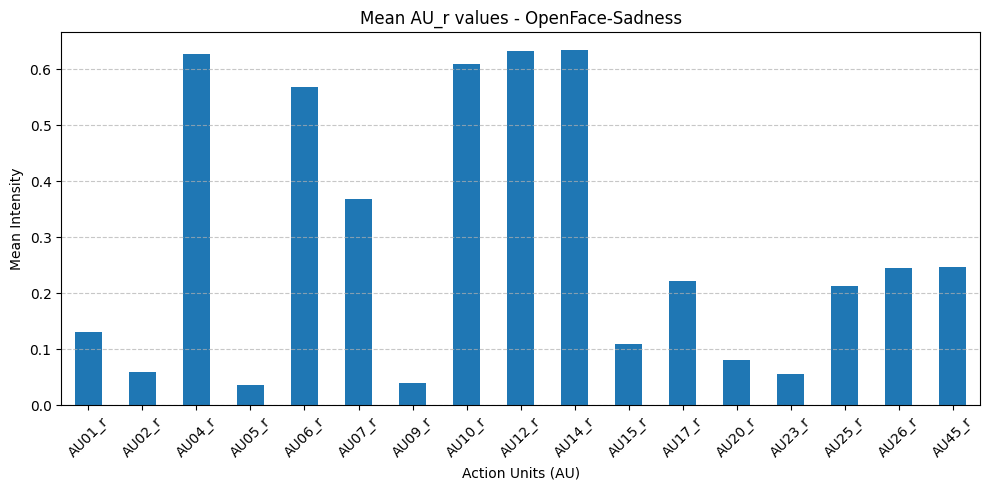

In [ ]:
import matplotlib.pyplot as plt


base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

for emotion in emotions:
    csv_path = os.path.join(base_path, emotion, f"mean_AUs_r_{emotion}.csv")

    if os.path.exists(csv_path):
        # Read the CSV
        df = pd.read_csv(csv_path, index_col=0)

        # Plot
        plt.figure(figsize=(10, 5))
        df["mean_value"].plot(kind="bar")
        plt.title(f"Mean AU_r values - OpenFace-{emotion.capitalize()}")
        plt.xlabel("Action Units (AU)")
        plt.ylabel("Mean Intensity")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True, axis="y", linestyle="--", alpha=0.7)

        # Save the figure
        output_png = os.path.join(base_path, emotion, f"{emotion}_OpenFace_au_plot.png")
        plt.savefig(output_png)
        print(f"Saved plot for {emotion} to {output_png}")

        plt.show()

    else:
        print(f"CSV not found for {emotion}")
